# Introduction

## The Problem:

The bank recently experienced a decline in the number of subcriptions for their [term deposit](https://www.investopedia.com/terms/t/termdeposit.asp). They have come up with ads for their existing clients to address this and would like to do a targeted marketing approach. They would like to predict which of their clients have a higher chance to subscribe for a term deposit.

## Objective: 
- To understand what factors contributed most to term deposit subscription.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain client will subscribe for a term deposit or not. 

- To create or improve different marketing strategies for clients that are least likely to subscribe for a term deposit.


The implementation of this model will allow the bank to create better marketing strategies.

## Categories of Analytics covered:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
full_dataset = pd.read_csv('data/bank.csv')

In [3]:
full_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Data Quality Check

In [4]:
# check for missing values
full_dataset.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

### Input variables:
#### Client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 'student', 'technician', 'unemployed', 'unknown') <br>
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') <br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown') <br>
6 - balance: average yearly balance (numeric) <br>
7 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown') <br>
8 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown') <br>

#### Campaign data:
9 - contact: contact communication type (categorical: 'cellular','telephone') <br>
10 - day: last contact day of month (numeric) <br>
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>


#### Output variable (desired target):
17 - deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
# rename columns
full_dataset = full_dataset.rename( columns = { 'campaign' : 'contacts',
                                              'pdays' : 'previous_days',
                                              'previous' : 'previous_contacts',
                                              'poutcome' : 'previous_outcome'})

In [6]:
# change values of deposit to 0 (did not subscribe) and 1 (subscribed)

new_dict = {'yes' : 1, 'no' : 0}

full_dataset = full_dataset.replace({'deposit' : new_dict})

In [7]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                11162 non-null  int64 
 1   job                11162 non-null  object
 2   marital            11162 non-null  object
 3   education          11162 non-null  object
 4   default            11162 non-null  object
 5   balance            11162 non-null  int64 
 6   housing            11162 non-null  object
 7   loan               11162 non-null  object
 8   contact            11162 non-null  object
 9   day                11162 non-null  int64 
 10  month              11162 non-null  object
 11  duration           11162 non-null  int64 
 12  contacts           11162 non-null  int64 
 13  previous_days      11162 non-null  int64 
 14  previous_contacts  11162 non-null  int64 
 15  previous_outcome   11162 non-null  object
 16  deposit            11162 non-null  int64

In [8]:
# subcription rate
subscription_rate = full_dataset.deposit.value_counts() / 11162
subscription_rate

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [9]:
# descriptive stats for numerical columns
full_dataset.describe()

,age,balance,day,duration,contacts,previous_days,previous_contacts,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [10]:
subscription_summary = full_dataset.groupby('deposit')
subscription_summary.mean()

,age,balance,day,duration,contacts,previous_days,previous_contacts
deposit,,,,,,,
0,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
subscription_summary.std()

,age,balance,day,duration,contacts,previous_days,previous_contacts
deposit,,,,,,,
0,10.264815,2933.411934,8.322071,208.577530,3.244474,96.182893,1.979610
1,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272


#### Observation
There is an indicator that the duration of last contact, the number of days since the last contact and the number of previous contacts as they have the largest relative diffrence in terms of subscription outcome.

,age,balance,day,duration,contacts,previous_days,previous_contacts,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
contacts,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
previous_days,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous_contacts,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


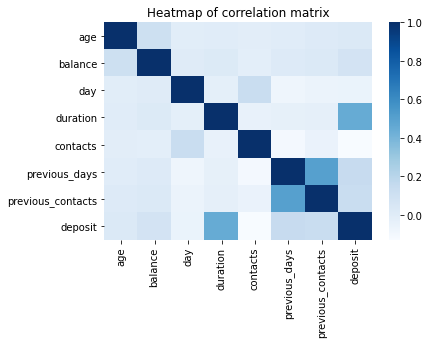

In [12]:
# correlation matrix
corr = full_dataset.corr()
sns.heatmap(corr, 
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           cmap = 'Blues')

plt.title('Heatmap of correlation matrix')

corr

### Exploratory Data Analysis

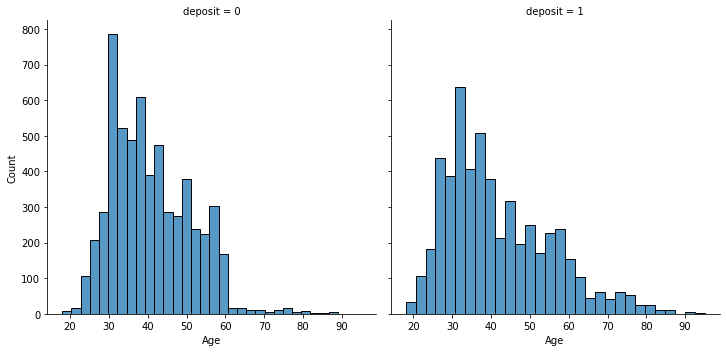

In [13]:
# visualise distribution of age

age_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
age_plot.map(sns.histplot, 'age', bins = 30)
age_plot.set_axis_labels('Age', 'Count')

#### Clients above 60 years old tend to subscribe for a term deposit.

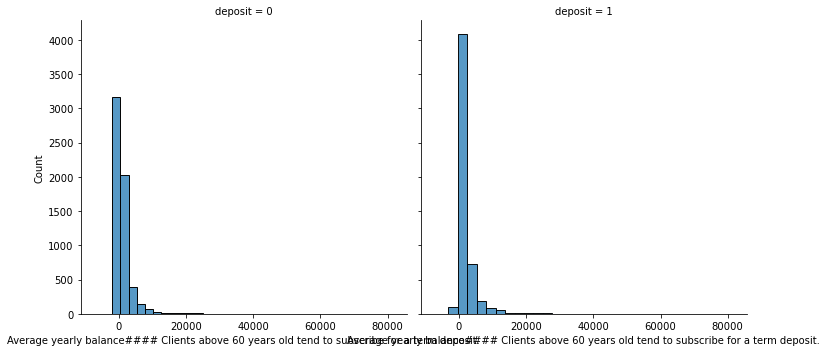

In [14]:
# visualise distribution of balance

age_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
age_plot.map(sns.histplot, 'balance', bins = 30)
age_plot.set_axis_labels('Average yearly balance#### Clients above 60 years old tend to subscribe for a term deposit.', 'Count')

#### Average yearly balance did not seem to have a major impact in the term deposit subscription.

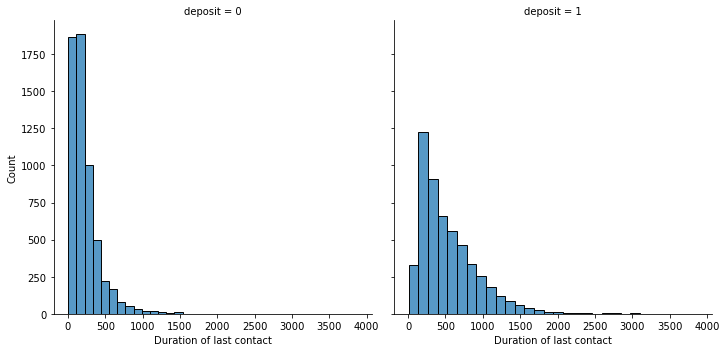

In [15]:
# visualise distribution of duration

duration_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
duration_plot.map(sns.histplot, 'duration', bins = 30)
duration_plot.set_axis_labels('Duration of last contact', 'Count')

#### Clients with a longer duration of contact generally emded up subscribing for a term deposit.

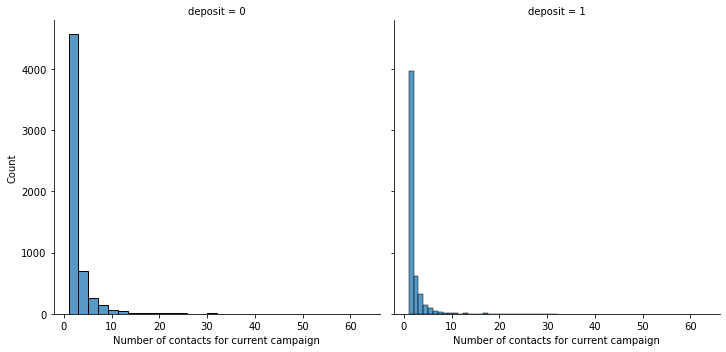

In [16]:
# visualise distribution of contacts

contacts_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
contacts_plot.map(sns.histplot, 'contacts', bins = 30)
contacts_plot.set_axis_labels('Number of contacts for current campaign', 'Count')

#### Number of contacts did not seem to have a major impact in the term deposit subscription.

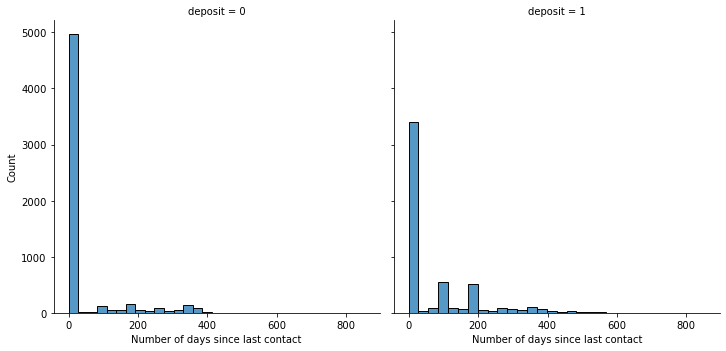

In [17]:
# visualise distribution of previous_days

prevD_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
prevD_plot.map(sns.histplot, 'previous_days', bins = 30)
prevD_plot.set_axis_labels('Number of days since last contact', 'Count')

#### Over 3000 clients subscribed for a term deposit upon being contacted for the first time. Clients also tend to subscribe for a term deposit when being contacted after the 100-days or 200-days mark.

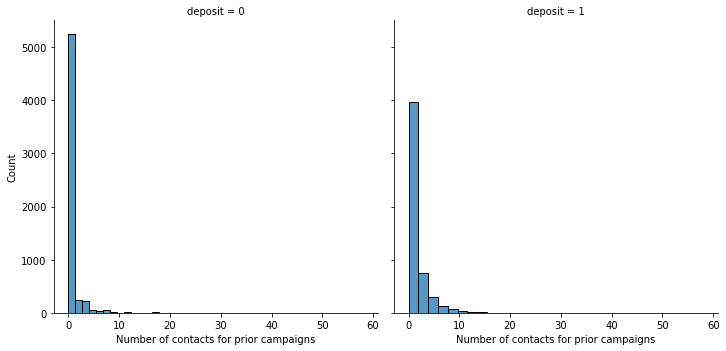

In [18]:
# visualise distribution of previous contacts

prevC_plot = sns.FacetGrid(full_dataset, col = 'deposit', height = 5)
prevC_plot.map(sns.histplot, 'previous_contacts', bins = 30)
prevC_plot.set_axis_labels('Number of contacts for prior campaigns', 'Count')

#### As opposed to the number fo contacts for current campaign, clients tend to subscribe for a term deposit if they wee contacted more frequently for prior campaigns.

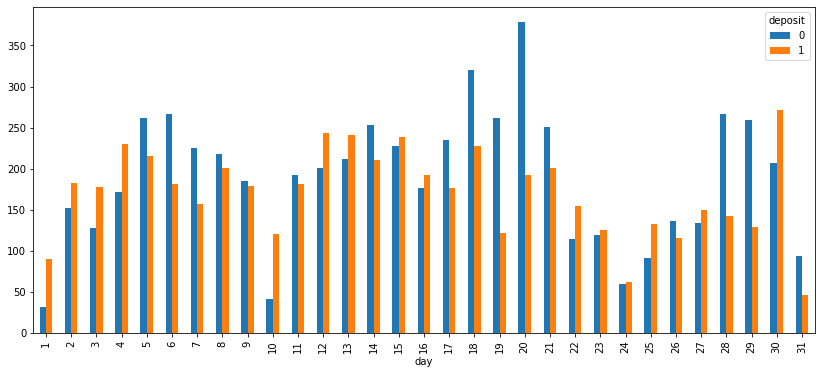

In [32]:
day = pd.crosstab(full_dataset['day'], full_dataset['deposit'])
day.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(day.index)), day.index);

More clients subscribed for a term deposit when contacted on days 1 - 4, 10, 12, 13, 25 and 30. <br>
When contacted on days 5 - 7, 17 - 21 and 28 - 29, clients tend to not subscribe for a term deposit.

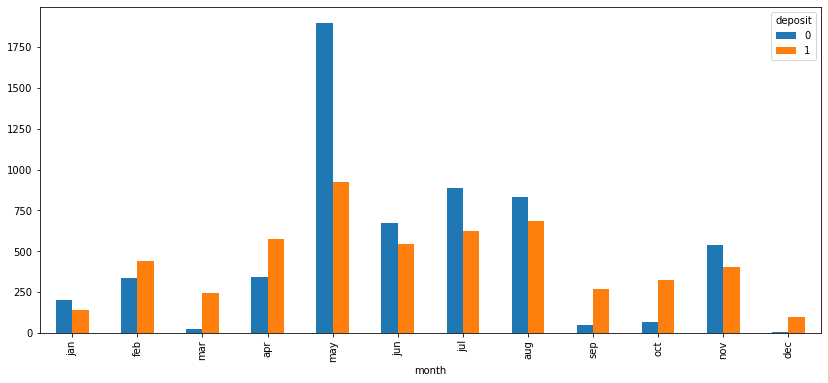

In [20]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month = pd.crosstab(full_dataset['month'], full_dataset['deposit']).reindex(months)
month.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(month.index)), month.index);

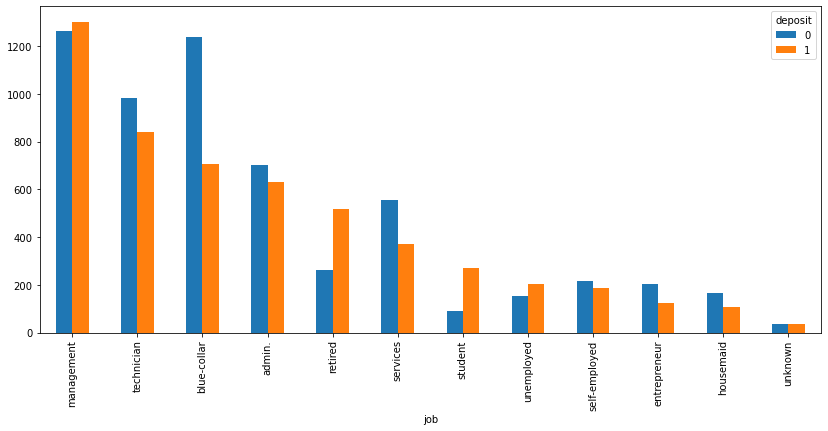

In [21]:
jobs = pd.crosstab(full_dataset['job'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
jobs.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(jobs.index)), jobs.index);

In [22]:
def cross_tab(df, col1, col2):
    new_df = pd.crosstab(df[col1], df[col2])
    return new_df

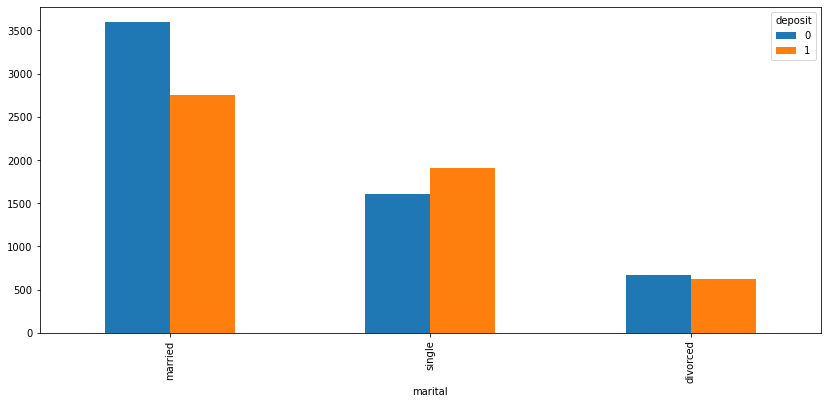

In [23]:
marital = pd.crosstab(full_dataset['marital'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
marital.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(marital.index)), marital.index);

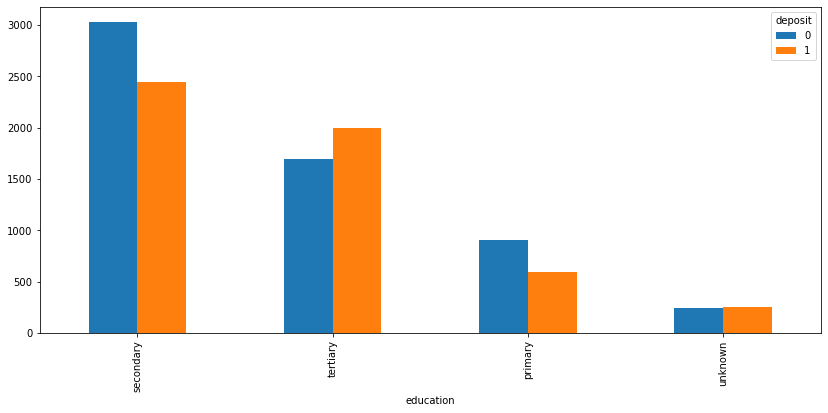

In [24]:
education = pd.crosstab(full_dataset['education'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
education.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(education.index)), education.index);

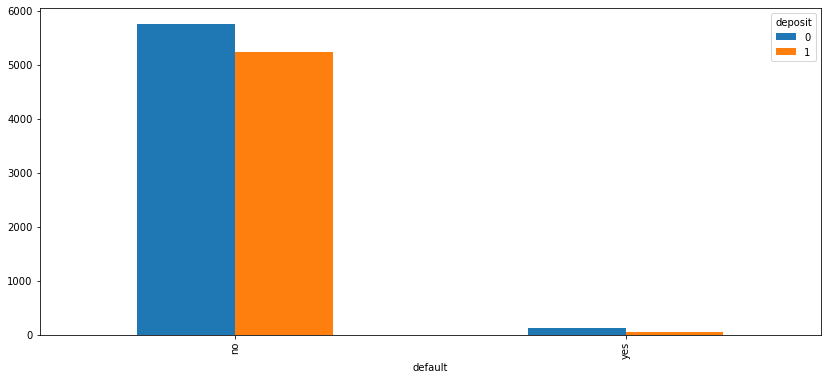

In [25]:
default = pd.crosstab(full_dataset['default'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
default.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(default.index)), default.index);

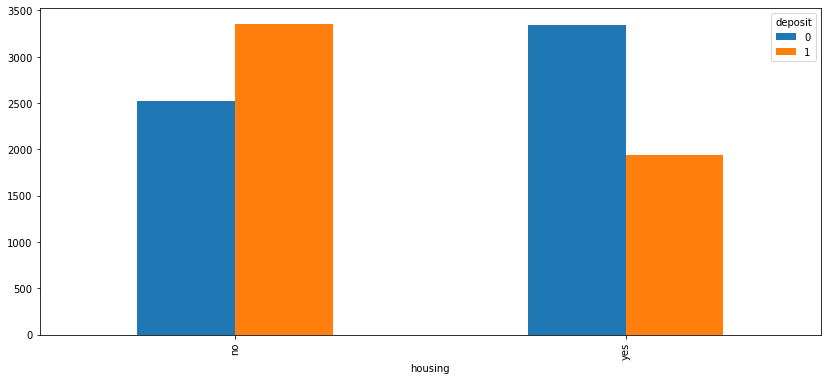

In [26]:
housing = pd.crosstab(full_dataset['housing'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
housing.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(housing.index)), housing.index);

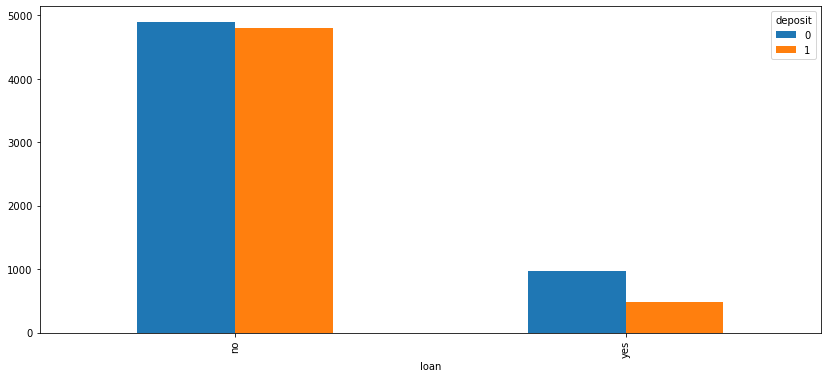

In [27]:
loan = pd.crosstab(full_dataset['loan'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
loan.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(loan.index)), loan.index);

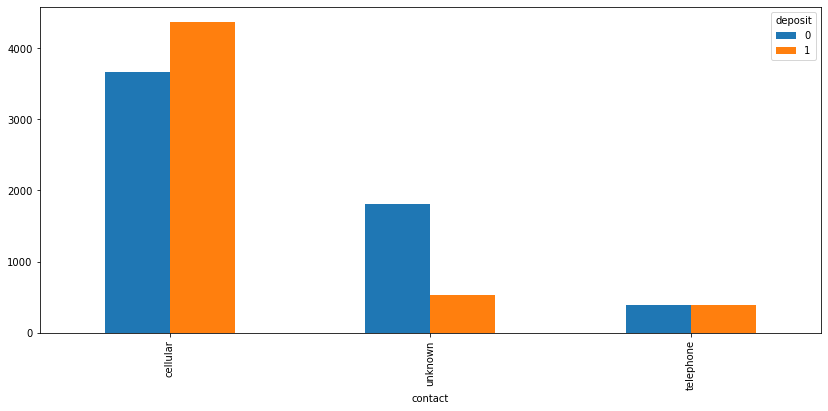

In [28]:
contact = pd.crosstab(full_dataset['contact'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
contact.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(contact.index)), contact.index);

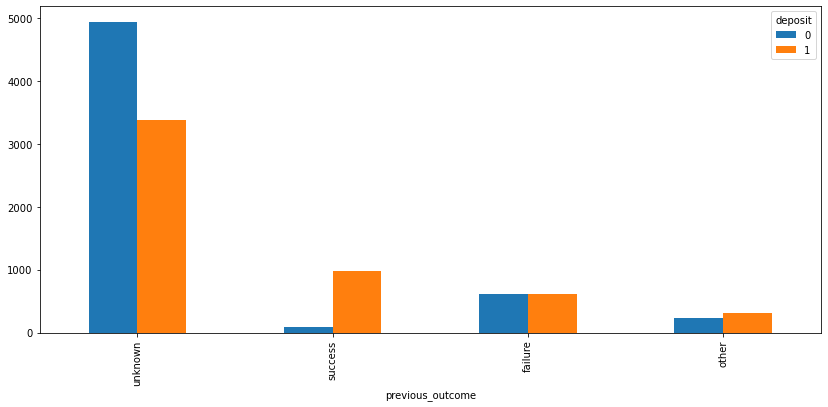

In [29]:
previous_outcome = pd.crosstab(full_dataset['previous_outcome'], full_dataset['deposit']).sort_values(by = [1, 0], ascending = False)
previous_outcome.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(previous_outcome.index)), previous_outcome.index);